In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import datetime as date

In [2]:
df = pd.read_csv("/content/Nat_Gas (1).csv")
df.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


In [3]:
# prompt: Using dataframe df: scatter plot

import altair as alt
chart = alt.Chart(df).mark_point().encode(x='Dates', y='Prices')
chart


alt.Chart(...)

<ipython-input-4-5a3574eac598>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


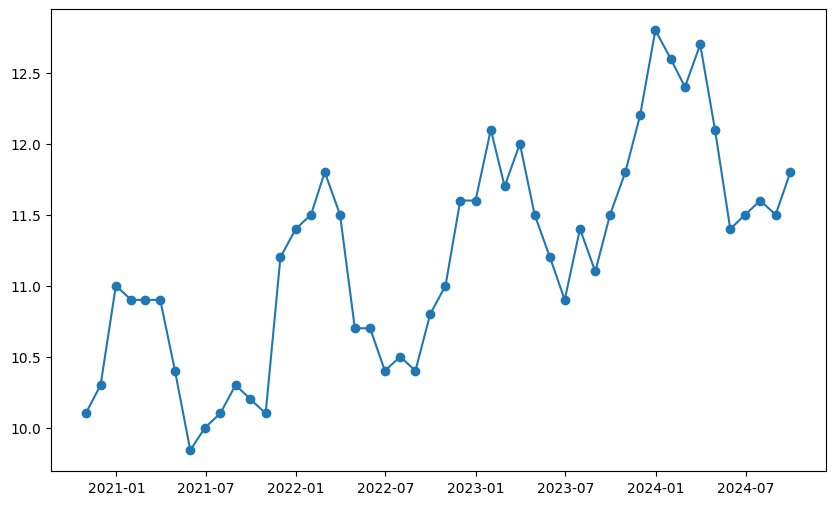

In [4]:
df['Dates'] = pd.to_datetime(df['Dates'])

plt.figure(figsize =(10,6))
plt.plot(df['Dates'] , df['Prices'] , marker = 'o' , linestyle = '-')
plt.show()

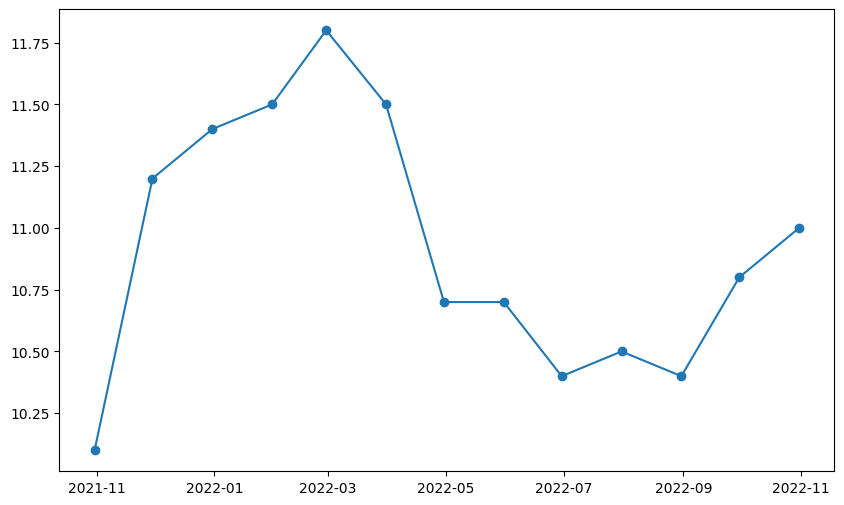

In [5]:
df2020_21 = df[12:25]
plt.figure(figsize =(10,6))
plt.plot(df2020_21['Dates'] , df2020_21['Prices'] , marker = 'o' , linestyle = '-')
plt.show()

In [6]:
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
grouped = df.groupby('Month')


In [7]:
regression_model = {}
for month, group in grouped:
  X = group['Year'].values.reshape(-1, 1)
  y = group['Prices']
  model = LinearRegression()
  model.fit(X,y)
  regression_model[month] = model

In [8]:
future_years = pd.DataFrame({'Year' : range(2022,2030)})
prediction = {}
for month, model in regression_model.items():
  prediction[month] = model.predict(future_years['Year'].values.reshape(-1,1))

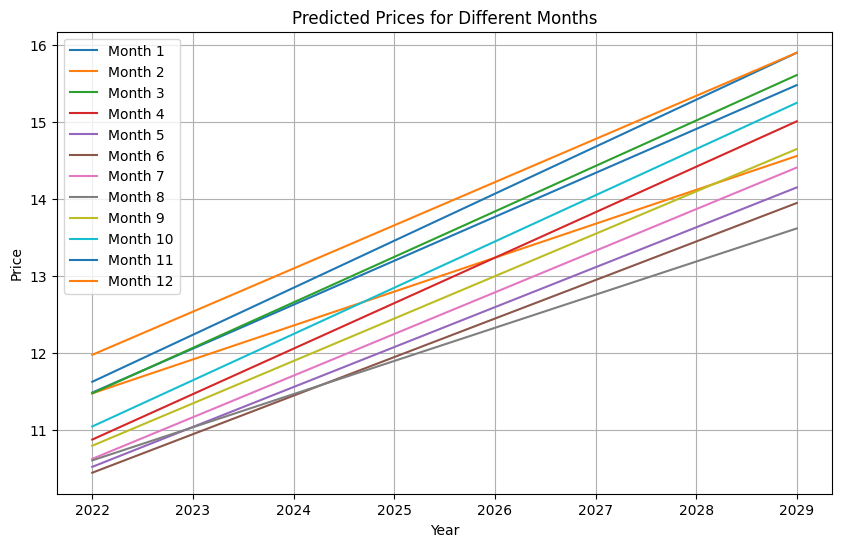

In [9]:
plt.figure(figsize=(10, 6))
for month, pred in prediction.items():
    plt.plot(future_years['Year'], pred, label=f'Month {month}')
plt.title('Predicted Prices for Different Months')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def predict_price(month, year):
    if month not in regression_model:
        return "Invalid month. Please choose a month between 1 and 12."
    model = regression_model[month]
    return model.predict([[year]])[0]

In [11]:
def price_contract(injection_dates, withdrawal_dates, purchase_prices, selling_prices, injection_rate, max_volume, storage_costs):
    total_revenue = 0
    total_cost = 0

    # Calculate revenue from selling gas
    for date, price in zip(withdrawal_dates, selling_prices):
        total_revenue += price * injection_rate

    # Calculate cost of purchasing gas
    for date, price in zip(injection_dates, purchase_prices):
        total_cost += price * injection_rate

    # Calculate total storage costs
    total_storage_costs = sum(storage_costs)

    # Calculate net profit
    net_profit = total_revenue - total_cost - total_storage_costs

    return net_profit

# Example usage:
injection_dates = ['2024-04-01', '2024-06-01']  # Injection dates
withdrawal_dates = ['2024-11-01', '2025-01-01']  # Withdrawal dates
purchase_prices = [2, 2]  # Purchase prices on injection dates ($/MMBtu)
selling_prices = [3, 3]  # Selling prices on withdrawal dates ($/MMBtu)
injection_rate = 1000000  # MMBtu injected/withdrawn per date
max_volume = 10000000  # Maximum volume that can be stored (MMBtu)
storage_costs = [100000, 100000]  # Storage costs for each injection/withdrawal date

estimated_value = price_contract(injection_dates, withdrawal_dates, purchase_prices, selling_prices, injection_rate, max_volume, storage_costs)
print("Estimated value of the contract: ${:,.2f}".format(estimated_value))


Estimated value of the contract: $1,800,000.00
